In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

In [5]:
import cv2
import os, gc, sys, glob
import pandas as pd
import numpy as np
from tqdm import tqdm

from sklearn import model_selection
from sklearn import metrics

In [6]:
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model, load_model
from keras import applications
from keras.callbacks import ReduceLROnPlateau

In [7]:
from keras.layers.normalization import BatchNormalization
from keras.metrics import categorical_accuracy
from keras.preprocessing.image import ImageDataGenerator

In [8]:
from tensorflow.keras.optimizers import RMSprop

In [9]:
from tensorflow.keras.applications import vgg19
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions

In [10]:
train_data_dir = 'drive/MyDrive/Downs_Syndrome_Detection-main/train'
test_data_dir = 'drive/MyDrive/Downs_Syndrome_Detection-main/test'

In [11]:
img_rows, img_cols = 224, 224 
model = vgg19.VGG19(weights='imagenet', include_top = False, input_shape=(img_rows,img_cols,3))

In [12]:
for layer in model.layers:
    layer.trainable = False

In [13]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [14]:
def addTopModel(bottom_model, num_classes, D=256):
    #creates the top or head of the model that will be placed ontop of the bottom layers

    top_model = bottom_model.output
    top_model = Flatten(name = "flatten")(top_model)
    top_model = Dense(D, activation = "relu")(top_model)
    top_model = Dropout(0.3)(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

In [15]:
num_classes=2
newmodel= addTopModel(model,num_classes)

In [16]:
modelnew = Model(inputs = model.input, outputs = newmodel)

In [17]:
modelnew.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

In [19]:
train_batchsize = 16

In [20]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=train_batchsize,
        class_mode='categorical')

Found 728 images belonging to 2 classes.


In [21]:
test_datagen = ImageDataGenerator(
      rescale=1./255)

In [22]:
test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=train_batchsize,
        class_mode='categorical')

Found 200 images belonging to 2 classes.


In [23]:
modelnew.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

In [24]:
history = modelnew.fit_generator(
    train_generator,
    steps_per_epoch = 32,
    epochs = 5,
   )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
32/32 [==============================] - 313s 10s/step - loss: 6.3297 - accuracy: 0.6014
Epoch 2/5
32/32 [==============================] - 317s 10s/step - loss: 1.2506 - accuracy: 0.7394
Epoch 3/5
32/32 [==============================] - 311s 10s/step - loss: 0.5651 - accuracy: 0.8224
Epoch 4/5
32/32 [==============================] - 311s 10s/step - loss: 0.4001 - accuracy: 0.8391
Epoch 5/5
32/32 [==============================] - 313s 10s/step - loss: 0.3008 - accuracy: 0.8736


In [25]:
model_name = 'facede1.h5'
modelnew.save('facede1.h5')

In [26]:
predict = modelnew.predict_generator(test_generator,steps = 200/train_batchsize)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


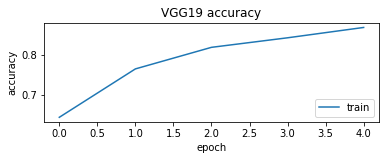

In [31]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('VGG19 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')

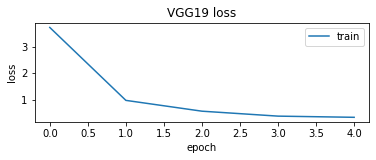

In [32]:
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('VGG19 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')